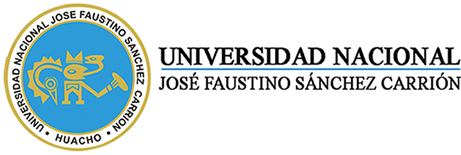

CURSO: "ANÁLISIS MULTIVARIADO" \
DOC: Víctor Guevara Ponce \
2023-II

# <center> **Detección y corrección de valores missing**

In [ ]:
#Importamos las librerias
# PANDAS ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
import pandas as pd
import numpy as np

# Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib .
# Proporciona una interfaz de alto nivel para realizar gráficos estadísticos atractivos e informativos.
import seaborn as sns
# Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python.
import matplotlib.pyplot as plt


# **CASO I**

### OBJETIVO
**Evaluar el riesgo de no pago, el objetivo se centra en predecir si un cliente que ya tiene un crédito podría llegar a incurrir en una situación de no pago de una de sus cuotas (MOROSIDAD).**


### Obtener los datos necesarios

* **ID**. Código del cliente
* **Edad**. Edad del cliente
* **Experiencia**. Tiempo en meses de cliente8 con el banco
* **Ingreso**. Ingreso anual estimado del cliente
* **Postal**. Código postal del cliente
* **Familia**. Números de personas dependientes del cliente
* **Credito**. Credito solicitado por el cliente (miles $)
* **Educacion**. Nivel de estudios del cliente
* **Cuenta de ahorros**. 0 Si el cliente no cuenta con cuentas de ahorros ,1 Si el cliente cuenta con cuentas de ahorros
* **Servicio online**. 0 Si el cliente no cuenta con servicio online, 1 Si el cliente cuenta con servicio online
* **Mora**. 0 Si el cliente no es moroso, 1 si el cliente es moroso

In [ ]:
#Cargamos el conjunto de datos
banco=pd.read_csv("https://raw.githubusercontent.com/VictorGuevaraP/ME-Machine-Learning/master/mora_m.csv", sep=";")
banco.head()|

In [ ]:
#Verificamos la dimensión del dataset
banco.shape

In [ ]:
#Verificamos el tipo de datos
banco.info()

In [ ]:
##Verificamos el tipo de datos
banco.dtypes

### **Según el tipo de datos**
<p> Podemos ver que algunos atributo (variables y/o columnas) no tienen el tipo de dato correcto.
Las variables cuantitativas deben ser de tipo 'float' (continuas) o 'int' (discretas), y las variables cualitativas  deben ser de tipo 'object' (string).

### **COERCIÓN**
Debemos convertir los tipos de datos al formato apropiado para cada columna utilizando el método "astype()".
</p>

In [ ]:
# Convertir el campo ID de un entero a un objeto
banco['ID'] = banco['ID'].astype('object')
banco['Mora'] = banco['Mora'].astype('object')
banco['educacion'] = banco['educacion'].astype('object')
banco['cuenta de ahorros'] = banco['cuenta de ahorros'].astype('object')
banco['servicios online'] = banco['servicios online'].astype('object')
#banco['Edad'] = banco['Edad'].astype('float64')
#banco['Experiencia'] = banco['Experiencia'].astype('float64')
#banco['Ingreso'] = banco['Ingreso'].astype('float64')

#forma 2
#banco.Ingreso= banco.Ingreso.astype('float64')
#forma 3
#banco[['educacion','cuenta de ahorros','servicios online','Mora']]=banco[['educacion','cuenta de ahorros','servicios online','Mora']].astype('int64')

In [ ]:
banco.dtypes

In [ ]:
#Vamos a quitar la variable Id y Postal
banco2=banco.drop(["ID", "Postal"], axis=1)

In [ ]:
#Mostramos las variabes
banco2.head()

In [ ]:
#Resumen de los datos
banco2.describe()

## **Evaluacion y correción de valores Missing o Ausentes**

### **Manejo de valores ausentes**

<>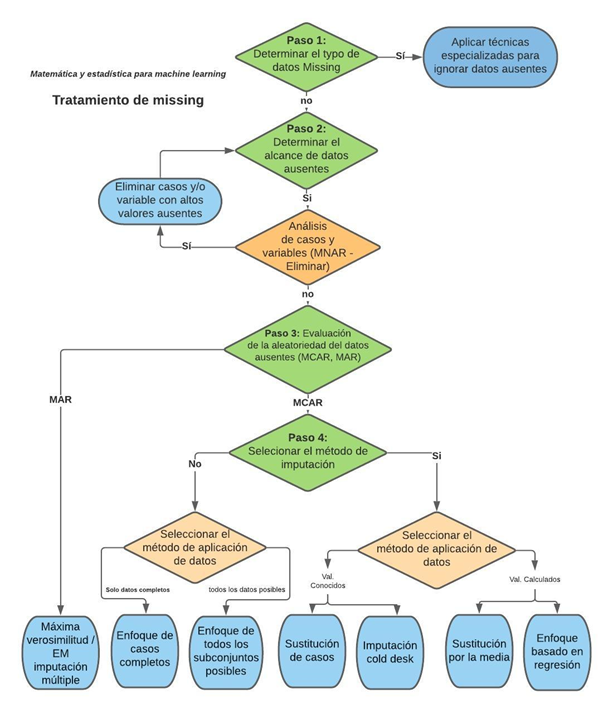

In [ ]:
#Análisis de los valores ausentes
banco2.isnull().sum()

In [ ]:
#Porcentaje de los valores ausentes
banco2.isnull().sum()/banco2.shape[0]*100

Según resultados tenemos:


*   Edad tiene 305 datos ausentes, representa un 7.13% de missing en la columna
*   Experiencia tiene 344 valores ausentes representa un 8.04% de missing en la columna
*   Ingreso tiene 388 valores ausentes representa un 9.07% de missing en la columna



### **Análisis de aleatoriedad de datos missing**

In [ ]:
#Mapa de calor de missing
sns.heatmap(banco2.isnull(), cbar=False, cmap="bwr")
plt.show()

In [ ]:
#Matriz de representaión de
import missingno as msno
msno.matrix(banco2, figsize=(12,6));

In [ ]:
#Representación de missing
msno.bar(banco2, figsize=(12,6));

In [ ]:
#Evaluar la correlación de nulidad: qué tan fuertemente la presencia o ausencia de una variable afecta la presencia de otra:
msno.heatmap(banco2, figsize=(12,6));

In [ ]:
#El dendrograma permite correlacionar de forma más completa la compleción de variables
#revela tendencias más profundas que las visibles por pares en el mapa de calor de correlación:
msno.dendrogram(banco2, figsize=(12,6));

### Manejo de valores Faltantes

1.   Eliminando datos
> *   Eliminar toda la fila
> *   Eliminar toda la columna

2.   Imputar datos
> *  Imputar por la media, mediana
> *  Imputar por la frecuencia
> *  Imputar según o detallado en el gráfico anterior

In [ ]:
# Histogramas
banco2.hist(edgecolor='black', linewidth=1.5, grid=False, figsize=(12, 6))
plt.show()

In [ ]:
banco2.dtypes

In [ ]:
banco2.columns

In [ ]:
banco_cuanti=banco2.drop(["educacion", "cuenta de ahorros", "servicios online"], axis=1)
banco_cuali=banco2.drop(['Edad', 'Experiencia', 'Ingreso', 'Familia', 'credito'], axis=1)

In [ ]:
sns.pairplot(banco_cuanti,hue="Mora", diag_kind='hist')
plt.show()

In [ ]:
#Aplicamos técnicas de imputación
banco_cuanti.isnull().sum()

In [ ]:
#Imputacion forma I
#Calculamos el promedio para edad
prom_edad = banco_cuanti["Edad"].astype("float").mean(axis=0)
print("Edad promedio es:", prom_edad)

In [ ]:
#Reemplazamos en los ausentes
banco_cuanti["Edad_1"]=banco_cuanti["Edad"].replace(np.nan, prom_edad)

In [ ]:
#Aplicamos técnicas de imputación
banco_cuanti.isnull().sum()

In [ ]:
#Imputacion forma II - (Criterio del investigador o analista)
banco_cuanti['Edad_2'] = banco_cuanti['Edad'].fillna(0)

In [ ]:
#Imputacion forma III - (Utilizando la mediana)
banco_cuanti['Edad_3'] = banco_cuanti['Edad'].fillna(banco_cuanti.Edad.median())

In [ ]:
#Imputacion forma IV - (Secuencia de valores)
banco_cuanti['Edad_4'] = banco_cuanti['Edad'].fillna(method = 'backfill')

In [ ]:
#Mostramos resultados para su comparación
banco_cuanti.describe()

In [ ]:
sns.pairplot(banco_cuanti,hue="Mora", diag_kind='hist')
plt.show()

In [ ]:
banco_cuanti.hist(edgecolor='black', linewidth=1.5, grid=False, figsize=(15, 8))
plt.show()

In [ ]:
# Evaluamos asimetria y Kurtosis de las variables
from scipy.stats import kurtosis
from scipy.stats import skew

In [ ]:
for variable in ["Edad", "Edad_1","Edad_2","Edad_3","Edad_4"]:
    print('\n',banco_cuanti[variable].name,":")
    print('Asimetría: ',skew(banco_cuanti[variable].dropna()))
    print('Kurtosis: ',kurtosis(banco_cuanti[variable].dropna()))

In [ ]:
#Eliminamos los atributos que no generan valor
banco_cuanti=banco_cuanti.drop(['Edad',"Edad_1",'Edad_2','Edad_3'], axis=1)

In [ ]:
banco_cuanti.isnull().sum()

## **Pregunta 1:**

De acuerdo al ejemplo, imputar NaN para las variables **Experiencia** e **Ingreso** según lo estudiado.

### >>>> Solución **(Click aquí)**
<!--

#Para Experiencia
banco_cuanti['Experiencia_1'] = banco_cuanti['Experiencia'].fillna(banco_cuanti.Experiencia.mean())
banco_cuanti['Experiencia_2'] = banco_cuanti['Experiencia'].fillna(0)
banco_cuanti['Experiencia_3'] = banco_cuanti['Experiencia'].fillna(banco_cuanti.Experiencia.median())
banco_cuanti['Experiencia_4'] = banco_cuanti['Experiencia'].fillna(method = 'backfill')
#Para ingreso
banco_cuanti['Ingreso_1'] = banco_cuanti['Ingreso'].fillna(banco_cuanti.Ingreso.mean())
banco_cuanti['Ingreso_2'] = banco_cuanti['Ingreso'].fillna(0)
banco_cuanti['Ingreso_3'] = banco_cuanti['Ingreso'].fillna(banco_cuanti.Ingreso.median())
banco_cuanti['Ingreso_4'] = banco_cuanti['Ingreso'].fillna(method = 'backfill')

banco_cuanti.describe()

#################
banco_cuanti=banco_cuanti.drop(['Experiencia',	'Ingreso', 'Experiencia_1',	'Experiencia_2',	'Experiencia_3' ,'Ingreso_1' ,'Ingreso_2',	'Ingreso_3'], axis=1)
#################
banco_cuanti.isnull().sum()
-->

### **Análisis de las variable no numéricas**

In [ ]:
banco_cuali.dtypes

In [ ]:
banco_cuali.describe(include="all")

In [ ]:
banco_cuali.nunique()

In [ ]:
#Creamos una tabla de frecuencia
educacion=pd.value_counts(banco_cuali['educacion'])
educacion_df=pd.DataFrame(educacion)
educacion_df.columns=["Frecuencia"]
educacion_df["Porcentaje %"]=educacion_df["Frecuencia"]/educacion_df["Frecuencia"].sum()*100
print(educacion_df)

In [ ]:
banco_cuali.isnull().sum()

In [ ]:
#Si hubiesen datos perdidos (utilizando la moda)
#banco_cuali['educacion'].value_counts().idxmax()

In [ ]:
#Forma I
#Reemplazamos como los casos anteriores
#banco_cuali["educacion"].replace(np.nan, "1", inplace=True)
#Forma II
#Imputacion por moda o criterio experto y seguimos trabajando.
#df['educacion'] = df['educacion'].fillna('1')
#df['cuenta de ahorros'] = df['cuenta de ahorros'].fillna('0')


In [ ]:
banco_cuanti=banco_cuanti.drop(['Mora'], axis=1)
banco_final = pd.concat([banco_cuanti,banco_cuali],axis=1)
banco_final.head()

# **IMPUTACIÓN AVANZADA**
(Profundizaremos sobre este tema en las sesiones posteriores cuando llegemos a distancias)

In [ ]:
banco2.isnull().sum()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
# Imputacion Multivariada
Imputador = IterativeImputer(missing_values=np.nan, max_iter=10,
                            n_nearest_features=9,
                       random_state=123)
Imputador

In [ ]:
#Imputador.fit(banco2[["Edad","Experiencia","Ingreso"]])
Imputador.fit(banco2)

In [ ]:
banco_imput = pd.DataFrame(data=Imputador.transform(banco2))

In [ ]:
banco2.head()

In [ ]:
banco_imput.isnull().sum()

In [ ]:
##############################################################################

Estandarización y Normalización

In [ ]:
banco_final.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#Escalando las variables
scaled_features =scaler.fit_transform(banco_cuanti)
banco_scal = pd.DataFrame(scaled_features, index=banco_cuanti.index, columns=banco_cuanti.columns)
banco_scal.head()

In [ ]:
# Boxplots con variables estadnarizadas
sns.boxplot( data = banco_scal);

In [ ]:
banco_scal["credito"]<3

In [ ]:
#Eliminar atípicos
banco_3=banco_final[banco_final.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
print(banco_3.shape)

In [ ]:
banco_cuanti1=banco_cuanti

In [ ]:
import scipy as sp

In [ ]:
def mahalanobis(x=None, data=None, cov=None):
  x_mu = x - np.mean(data)
  if not cov:
      cov = np.cov(data.values.T)
  inv_cov = sp.linalg.inv(cov)
  parte1 = np.dot(x_mu, inv_cov)
  mahalan = np.dot(parte1 , x_mu.T)
  return mahalan.diagonal()

In [ ]:
data_condistancia = banco_cuanti1
data_condistancia ['Distancia_mahalanobis'] = mahalanobis(x=data_condistancia , data=banco_cuanti1)
data_condistancia .head()

In [ ]:
nueva_data = data_condistancia.drop(data_condistancia[data_condistancia['Distancia_mahalanobis']>3].index)
nueva_data.head()

In [ ]:
# restablece el índice debido a que eliminamos dos filas
nueva_data.reset_index(drop=True, inplace=True)
nueva_data.head()

In [ ]:
x_mu = banco_cuanti - np.mean(banco_cuanti1)
x_mu

In [ ]:
cov = np.cov(banco_cuanti1.values.T)
cov

In [ ]:
inv_cov = sp.linalg.inv(cov)
inv_cov

In [ ]:
parte1 = np.dot(x_mu, inv_cov)
parte1

In [ ]:
mahalan = np.dot(parte1 , x_mu.T)
mahalan

In [ ]:
mahalan.diagonal()